# Hands-on #4: PyMC3

In [2]:
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd

In [3]:
durations = np.random.exponential(scale=10.0, size=1000)

In [4]:
durations

array([2.05775960e+01, 8.16594933e-01, 2.46600994e+01, 6.36151302e+00,
       1.57509415e+01, 6.33904982e+00, 3.45335895e+00, 8.44238752e+00,
       2.95490907e-01, 3.23491073e+01, 8.93682537e+00, 6.90961406e+00,
       2.31256593e+01, 4.59784079e+01, 3.48039433e-01, 1.64206724e+01,
       8.52916946e+00, 7.21460068e+00, 5.03881747e+00, 1.07646707e+01,
       2.48258854e+01, 4.36193487e+00, 6.88668849e+00, 1.39285270e+01,
       2.61352573e+01, 2.01016284e+00, 4.69251616e-02, 6.16569073e+00,
       5.39713005e+00, 1.99309723e+01, 2.79251861e-01, 1.13321581e+01,
       3.74221276e+00, 1.23945829e+00, 2.35137154e+00, 3.84098313e+01,
       1.44873984e+01, 6.13688561e+00, 2.80101227e+01, 3.68490614e+00,
       7.42445582e-01, 1.39967009e+01, 6.88760718e+00, 5.69372892e+00,
       3.68400546e+00, 1.29306438e+01, 2.81056922e+00, 2.09384177e+00,
       1.31579627e+01, 1.10555553e+01, 8.05000161e+00, 1.95091338e+00,
       3.25459368e+00, 1.83180151e+01, 3.07420741e+01, 2.37208201e+01,
      

In [5]:
s = pd.Series(durations)
s.describe()

count    1000.000000
mean        9.763021
std         9.659839
min         0.002704
25%         2.766634
50%         6.749218
75%        13.809136
max        57.083903
dtype: float64

In [13]:
model = pm.Model()

with model:
    scale = pm.Uniform('scale', lower=0, upper=100)
    lp = pm.Exponential('lp', lam=1/scale, observed=durations)
    trace = pm.sample(5000, chains=2, random_seed=123)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_44923/1327695204.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [scale]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 4 seconds.


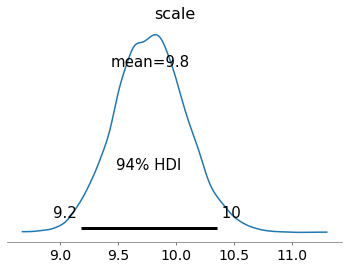

In [14]:
with model:
    az.plot_posterior(trace)  # TODO. plot the posterior function

In [15]:
az.summary(trace, hdi_prob=0.95) # TODO Get the summary statistics

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
scale,9.779,0.31,9.191,10.411,0.005,0.003,4168.0,6900.0,1.0
